# Outlier Treatment

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import boston dataset
data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Data Preprocessing\\DataSets\\boston_data.csv')

In [3]:
# Top rows of dataset
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
# Check the column titles
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
# Shape of dataset
data.shape

(404, 14)

In [6]:
# Get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [7]:
# Check for null values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

There are no null values in the given datasets 

In [8]:
# Check for duplicate values

data.duplicated().sum()

0

There are no duplicate values

In [9]:
# Display desciptive statistics for the dataset
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [10]:
# Use boxplot to check for outliers
feature_dict = pd.DataFrame(columns=['Name of Feature','Description','Type','Relevance'])

In [11]:
feature_dict ['Name of Feature'] = data.columns

In [12]:
feature_dict ['Description'] = ['per capita crime rate by town',
'proportion of residential land zoned for lots over 25,000 sq.ft.',
'proportion of non-retail business acres per town',
'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
'nitric oxides concentration (parts per 10 million)',
'average number of rooms per dwelling',
'proportion of owner-occupied units built prior to 1940',
'weighted distances to five Boston employment centres',
'index of accessibility to radial highways',
'full-value property-tax rate per $10,000',
'pupil-teacher ratio by town',
'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
'% lower status of the population',
'Median value of owner-occupied homes in $1000s']

In [13]:
feature_dict['Type'] = ['Ratio','Ratio','Ratio','Nominal',
                        'Ratio','Ratio','Ratio','Ratio','Interval'
                        ,'Ratio','Ratio','Ratio','Ratio','Interval']

In [14]:
feature_dict['Relevance'] = ['Relevant','Irrelevant','Irrelevant','Irrelevant','Irrelevant',
                            'Relevant','Relevant','Relevant','Irrelevant',
                            'Relevant','Relevant','Irrelevant','Relevant','Relevant',]

In [15]:
feature_dict

,Name of Feature,Description,Type,Relevance
0,crim,per capita crime rate by town,Ratio,Relevant
1,zn,proportion of residential land zoned for lots ...,Ratio,Irrelevant
2,indus,proportion of non-retail business acres per town,Ratio,Irrelevant
3,chas,Charles River dummy variable (1 if tract bound...,Nominal,Irrelevant
4,nox,nitric oxides concentration (parts per 10 mill...,Ratio,Irrelevant
5,rm,average number of rooms per dwelling,Ratio,Relevant
6,age,proportion of owner-occupied units built prior...,Ratio,Relevant
7,dis,weighted distances to five Boston employment c...,Ratio,Relevant
8,rad,index of accessibility to radial highways,Interval,Irrelevant
9,tax,"full-value property-tax rate per $10,000",Ratio,Relevant


In [16]:
# Dropping irrelevant features

data.drop(['zn','indus','chas','nox','rad','black'], axis = 1,inplace=True)

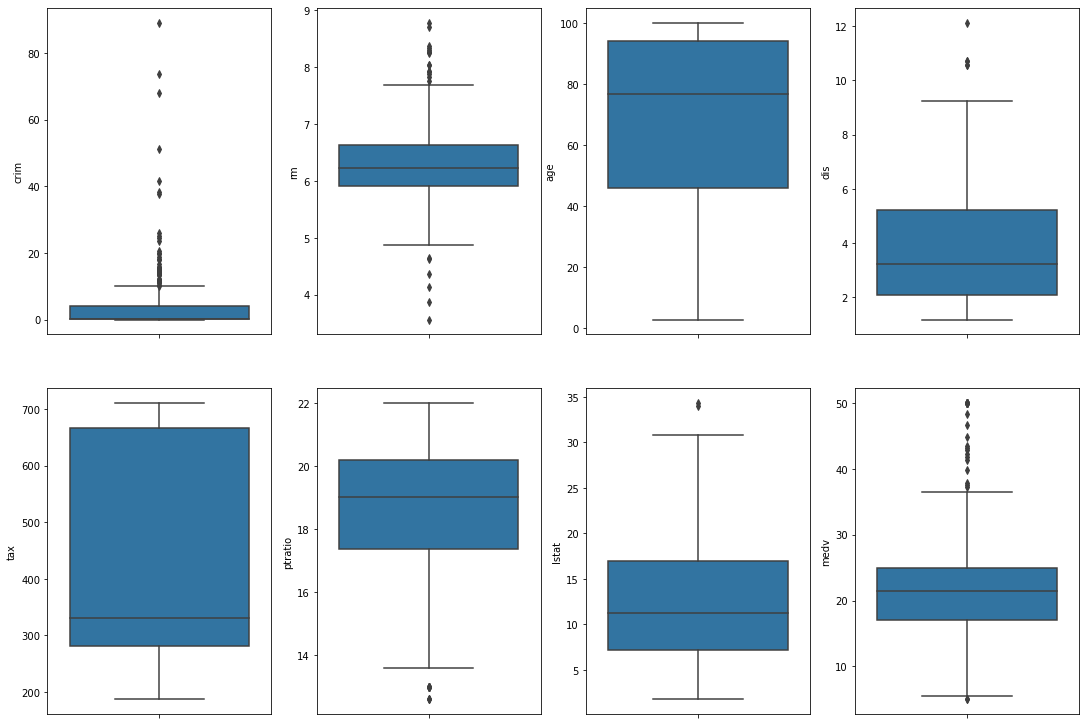

In [17]:
# Boxplot for all the features in the dataset to check for outliers

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outliers are present in crim, zn, rm, dis, ptratio, black, Istat, medv

In [18]:
#Using IQR for outlier treatments

for col in data.columns:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    low_end = data[col].quantile(0.25) - (1.5*IQR)
    upper_end = data[col].quantile(0.75) + (1.5*IQR)
    if low_end < 0:
        low_end = 0       
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                          np.where(data[col] < low_end,low_end,data[col])))
    else:
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                  np.where(data[col] < low_end,low_end,data[col])))
    

In [19]:
data

,crim,rm,age,dis,tax,ptratio,lstat,medv
0,0.15876,5.961,17.5,5.2873,305.0,19.2,9.88,21.70
1,0.10328,5.927,47.2,6.9320,284.0,19.7,9.22,19.60
2,0.34940,5.972,76.7,3.1025,304.0,18.4,9.97,20.30
3,2.73397,5.597,94.9,1.5257,403.0,14.7,21.45,15.40
4,0.04337,6.115,63.0,6.8147,243.0,16.8,9.43,20.50
...,...,...,...,...,...,...,...,...
399,9.32909,6.185,98.7,2.2616,666.0,20.2,18.13,14.10
400,10.00932,5.757,100.0,1.4130,666.0,20.2,10.11,15.00
401,0.01501,7.719,24.8,5.8850,198.0,13.6,3.16,36.85
402,0.02055,6.383,35.7,9.1876,313.0,17.3,5.77,24.70


In [20]:
# Descriptive statistics of new dataset
data.describe()

,crim,rm,age,dis,tax,ptratio,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,2.411491,6.293507,68.601733,3.787040,411.688119,18.451609,12.585953,21.754827
std,3.582254,0.601909,28.066143,2.068639,171.073553,2.132154,6.886921,7.421437
min,0.006320,4.813000,2.900000,1.169100,187.000000,13.137500,1.730000,5.250000
25%,0.082382,5.902750,45.800000,2.087875,281.000000,17.375000,7.135000,17.100000
50%,0.253715,6.230500,76.600000,3.207450,330.000000,19.000000,11.265000,21.400000
75%,4.053158,6.629250,94.150000,5.222125,666.000000,20.200000,16.910000,25.000000
max,10.009320,7.719000,100.000000,9.923500,711.000000,22.000000,31.572500,36.850000


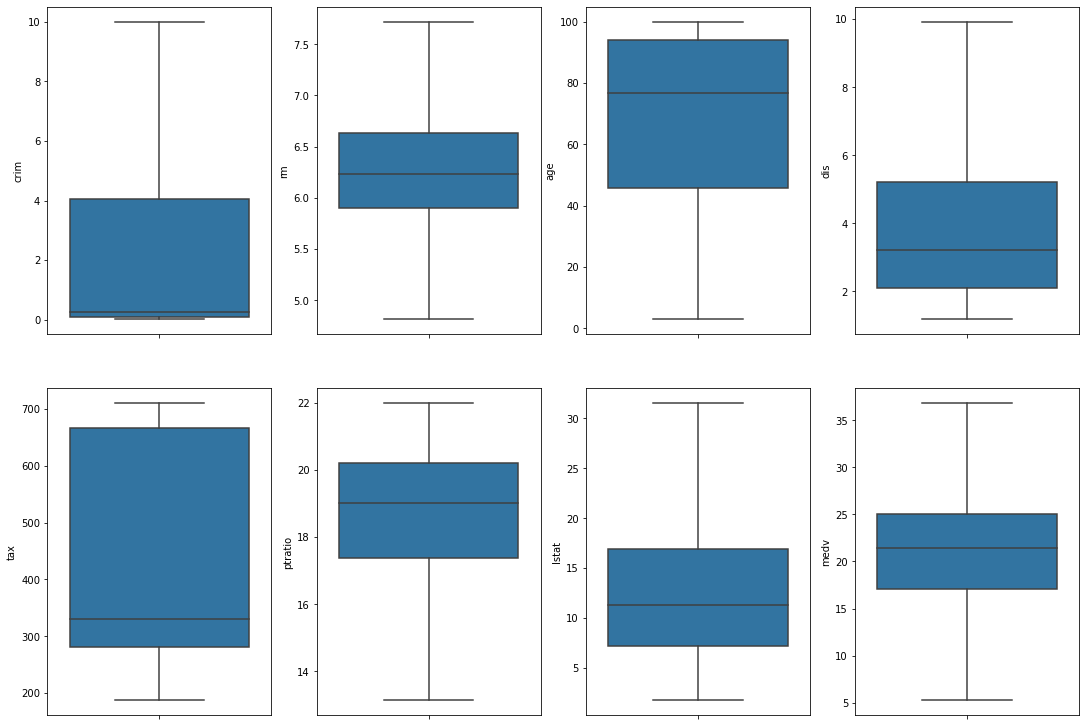

In [22]:
# Boxplot for all the features in the new dataset (outliers removed)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

All the duplicated values, outliers are treated and irrelevant data are dropped.
The new dataset can be used for model building.